## Importing Packages 

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Building an Image Classifier
First let's install and import TensorFlow and Keras

> conda install tensorflow

> conda install pip 

> pip install --upgrade tensorflow==2.0.0-rc1

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
keras.__version__

'2.8.0'

In [5]:
tf.__version__


'2.8.0'

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

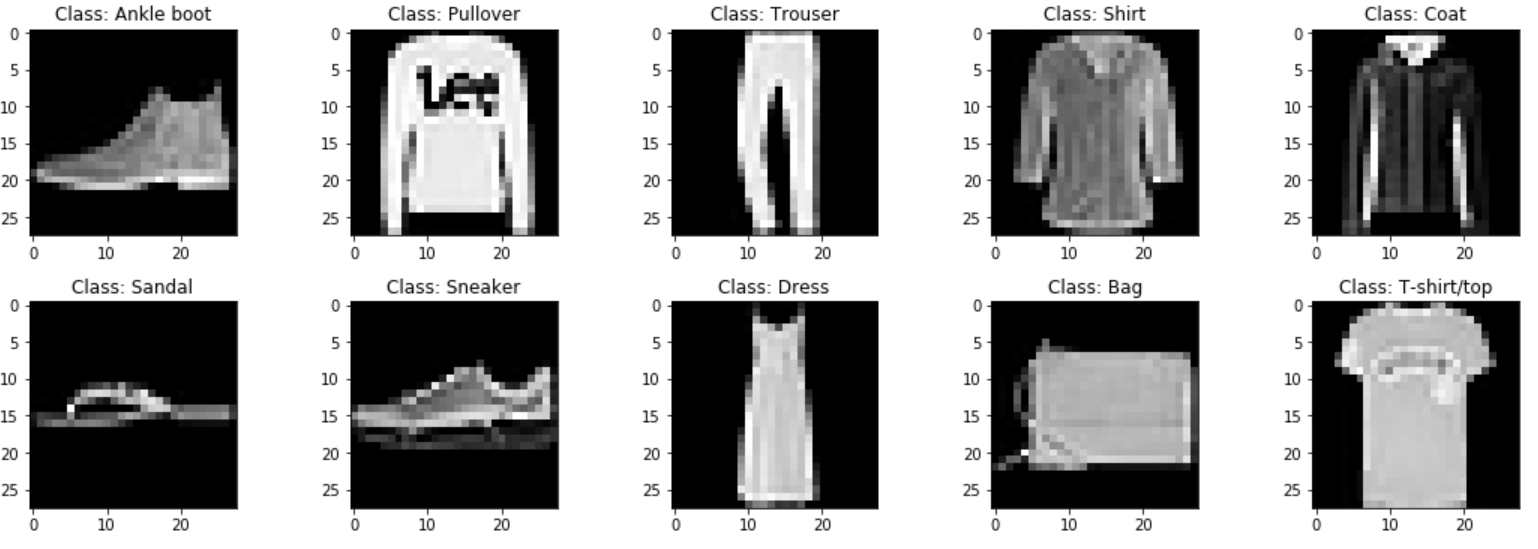

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

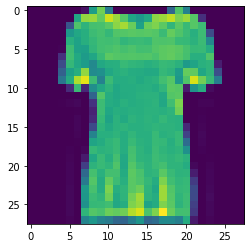

In [7]:
plt.imshow(X_train_full[10])

In [8]:
y_train_full[0]

9

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train_full[10]]

'T-shirt/top'

In [11]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [12]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [13]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

In [14]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

![](Seq_api.png "Title")

![](Functional.JPG "Title")

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

![](Structure.jpg "Title")

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [18]:
#import pydot
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


We can access the parameters using get_weight() method

In [19]:
weights, biases = model.layers[1].get_weights()

In [20]:
weights

array([[ 0.02570029, -0.00921319, -0.02297589, ...,  0.03759523,
         0.01990343, -0.00419658],
       [ 0.0493257 ,  0.07532704,  0.04591972, ...,  0.01272719,
         0.07017377,  0.06893378],
       [-0.00902112,  0.0490617 ,  0.01508749, ...,  0.00632862,
        -0.02900814, -0.04371899],
       ...,
       [ 0.06044598,  0.02830634,  0.04788385, ..., -0.02156743,
        -0.06206664, -0.06688078],
       [ 0.03822813,  0.07278952,  0.02177001, ..., -0.04696669,
        -0.04292265,  0.0316055 ],
       [-0.01534326, -0.03178874, -0.04308994, ...,  0.00643031,
         0.02572545, -0.03443564]], dtype=float32)

In [21]:
weights.shape

(784, 200)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
biases.shape

(200,)

Documentation - https://keras.io/models/sequential/

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [25]:
model_history = model.fit(X_train, y_train, epochs=60,
                    validation_data=(X_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.7493 - accuracy: 0.7593 - val_loss: 0.5433 - val_accuracy: 0.8112
Epoch 2/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4965 - accuracy: 0.8266 - val_loss: 0.4565 - val_accuracy: 0.8465
Epoch 3/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4494 - accuracy: 0.8434 - val_loss: 0.4764 - val_accuracy: 0.8287
Epoch 4/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4235 - accuracy: 0.8522 - val_loss: 0.4047 - val_accuracy: 0.8623
Epoch 5/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4046 - accuracy: 0.8572 - val_loss: 0.4023 - val_accuracy: 0.8567
Epoch 6/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3869 - accuracy: 0.8646 - val_loss: 0.3913 - val_accuracy: 0.8665
Epoch 7/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3742 - accuracy: 0.8676 - val_loss: 0.3908 - val_accuracy:

1688/1688 [==============================] - 5s 3ms/step - loss: 0.1566 - accuracy: 0.9441 - val_loss: 0.3336 - val_accuracy: 0.8863
Epoch 58/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1538 - accuracy: 0.9457 - val_loss: 0.3015 - val_accuracy: 0.8940
Epoch 59/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1530 - accuracy: 0.9453 - val_loss: 0.3259 - val_accuracy: 0.8918
Epoch 60/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1497 - accuracy: 0.9471 - val_loss: 0.3126 - val_accuracy: 0.8925


In [26]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [27]:
model_history.history

{'loss': [0.7492921948432922,
  0.49651503562927246,
  0.4494030177593231,
  0.4235137701034546,
  0.40456122159957886,
  0.3869389593601227,
  0.37422168254852295,
  0.3623256981372833,
  0.3523007333278656,
  0.3415879011154175,
  0.33362770080566406,
  0.32604050636291504,
  0.3179287910461426,
  0.31105902791023254,
  0.304488867521286,
  0.2985077500343323,
  0.2932041585445404,
  0.2870011329650879,
  0.2817101776599884,
  0.2766588032245636,
  0.27255186438560486,
  0.2680269181728363,
  0.2625066637992859,
  0.25877827405929565,
  0.2527524530887604,
  0.24979783594608307,
  0.24623316526412964,
  0.24137482047080994,
  0.23797842860221863,
  0.23400907218456268,
  0.23018158972263336,
  0.22670555114746094,
  0.22386103868484497,
  0.2213122397661209,
  0.21732106804847717,
  0.21438999474048615,
  0.21099618077278137,
  0.20755653083324432,
  0.20474135875701904,
  0.20106667280197144,
  0.1991531103849411,
  0.19693920016288757,
  0.19346636533737183,
  0.1913503259420395,
 

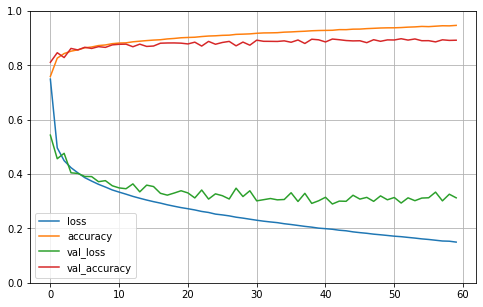

In [28]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8866


[0.34946298599243164, 0.8866000175476074]

In [30]:
X_new = X_test[:5]

In [31]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.16, 0.  , 0.  , 0.  , 0.  , 0.  , 0.84, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
y_pred = np.argmax(model.predict(X_new),axis=-1)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

AxesImage(54,36;334.8x217.44)


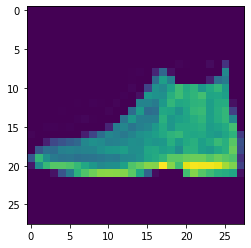

In [34]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


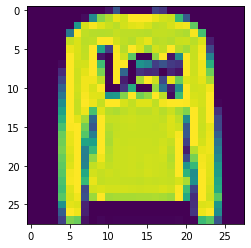

In [35]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


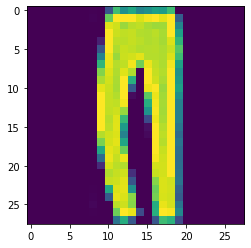

In [36]:
print(plt.imshow(X_test[2]))

AxesImage(54,36;334.8x217.44)


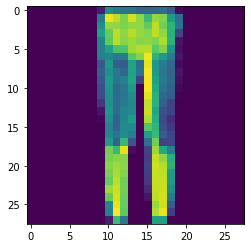

In [37]:
print(plt.imshow(X_test[3]))

AxesImage(54,36;334.8x217.44)


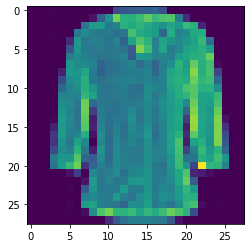

In [38]:
print(plt.imshow(X_test[4]))